Paleta de colores
['#f5f5f1', '#e50914', '#b20710', '#221f1f']


In [2]:
import pandas as pd

# Intenta leer el archivo ignorando líneas con errores
df = pd.read_csv("netflix.csv")

# Guarda el resultado en un archivo Excel nuevo
df.to_excel("netflix.xlsx",index=False)

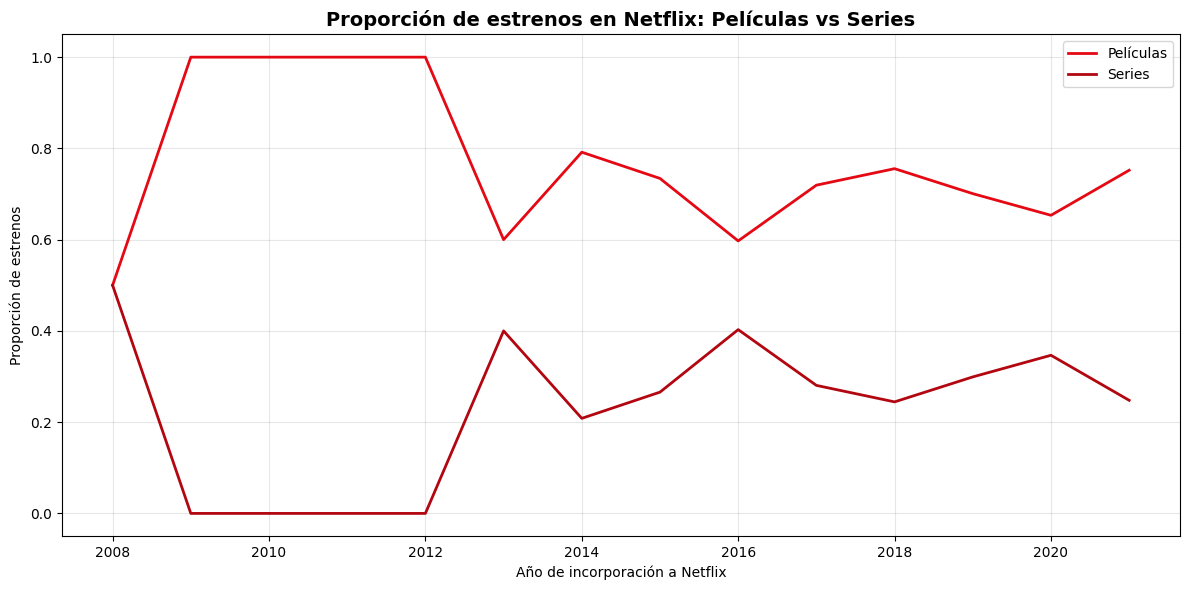

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# ============================
# Configuración
# ============================
INPUT_CSV = "netflix.csv"   # Reemplaza con tu ruta real
PALETTE = ['#f5f5f1', '#e50914', '#b20710', '#221f1f']

# ============================
# Cargar dataset
# ============================
df = pd.read_csv(INPUT_CSV)

# Parsear fecha de incorporación
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extraer año de incorporación
df['year_added'] = df['date_added'].dt.year

# Eliminar filas sin fecha
df = df.dropna(subset=['year_added'])

# ============================
# Agrupar por año y tipo
# ============================
counts = df.groupby(['year_added', 'type']).size().reset_index(name="count")

# Pivotear para calcular proporciones
pivot = counts.pivot(index="year_added", columns="type", values="count").fillna(0)

# Calcular proporciones por año
pivot['total'] = pivot.sum(axis=1)
pivot['Movie_ratio'] = pivot.get('Movie', 0) / pivot['total']
pivot['TV Show_ratio'] = pivot.get('TV Show', 0) / pivot['total']

# ============================
# Visualización
# ============================
plt.figure(figsize=(12,6))
plt.plot(pivot.index, pivot['Movie_ratio'], label="Películas", color=PALETTE[1], linewidth=2)
plt.plot(pivot.index, pivot['TV Show_ratio'], label="Series", color=PALETTE[2], linewidth=2)

plt.title("Proporción de estrenos en Netflix: Películas vs Series", fontsize=14, weight="bold")
plt.xlabel("Año de incorporación a Netflix")
plt.ylabel("Proporción de estrenos")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()
